In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Summary of Weather.csv")

In [4]:
df.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [6]:
df.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
dropping_columns=["WindGustSpd","PoorWeather","PRCP","DR","SPD","SND","FT","FB","FTI","ITH","PGT","TSHDSBRSGF","SD3","RHX","RHN","RVG","WTE"]
def dropping(df):
    for i in dropping_columns:
        df.drop(labels=i,axis=1,inplace=True)

In [8]:
df.columns.str.strip()

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [9]:
dropping(df)
df.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

In [10]:
df.head(5)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,78.0,72.0,75.0,0.0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0.0,42,7,2,84.0,71.0,78.0,0.0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0.0,42,7,3,79.0,72.0,76.0,0.0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0.0,42,7,4,80.0,72.0,76.0,0.0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0.0,42,7,5,80.0,71.0,76.0,0.0


In [11]:
df["Snowfall"].unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [12]:
df["Snowfall"]=df["Snowfall"].str.replace('#VALUE!',"")
df["Snowfall"]=df["Snowfall"].replace("",np.nan)

In [13]:
df["Snowfall"]=df["Snowfall"].astype(float)

In [14]:
df["Snowfall"].unique()

array([  nan,  0.  , 22.86, 33.02, 30.48,  2.54,  5.08, 10.16,  7.62,
       20.32, 15.24, 17.78, 12.7 , 25.4 , 27.94, 43.18, 38.1 , 45.72,
       53.34, 58.42, 66.04, 76.2 , 81.28, 73.66, 63.5 , 50.8 , 48.26,
       60.96, 55.88, 35.56, 78.74, 40.64, 86.36, 83.82, 68.58])

In [15]:
values1=df["Snowfall"].mean()
values1

0.9016290592356488

In [16]:
df["Snowfall"]=df["Snowfall"].fillna(values1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  119040 non-null  float64
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  MAX       118566 non-null  float64
 11  MIN       118572 non-null  float64
 12  MEA       118542 non-null  float64
 13  SNF       117877 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 12.7+ MB


In [18]:
df["SNF"].unique()
df["SNF"]=df["SNF"].replace("T",np.nan)
df["SNF"]=df["SNF"].astype(float)
value2=df["SNF"].mean()
df["SNF"]=df["SNF"].fillna(value2)

In [19]:
df["Date"]=pd.to_datetime(df["Date"])

In [20]:
df["Precip"].unique()
df["Precip"]=df["Precip"].replace("T",np.nan)
df["Precip"]=df["Precip"].astype(float)
value3=df["Precip"].mean()
df["Precip"]=df["Precip"].fillna(value3)

In [21]:
df.isnull().sum()

STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
Snowfall      0
YR            0
MO            0
DA            0
MAX         474
MIN         468
MEA         498
SNF           0
dtype: int64

In [22]:
list1=["MAX","MIN","MEA"]

In [23]:
def mean_fun(df):
    for z in list1:
        mean=df[z].mean()
        df[z]=df[z].fillna(mean)
        
mean_fun(df)


In [24]:
df.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [25]:
df.head(5)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.901629,42,7,1,78.0,72.0,75.0,0.0
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,0.901629,42,7,2,84.0,71.0,78.0,0.0
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,0.901629,42,7,3,79.0,72.0,76.0,0.0
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,0.901629,42,7,4,80.0,72.0,76.0,0.0
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,0.901629,42,7,5,80.0,71.0,76.0,0.0


In [26]:
df.describe()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF
count,119040.000000,119040,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,1944-04-27 16:35:07.741935616,3.753917,27.045111,17.789511,22.411631,0.901629,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843,0.009667
min,10001.000000,1940-01-01 00:00:00,0.000000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000,0.000000
25%,11801.000000,1943-09-03 00:00:00,0.000000,25.555556,15.000000,20.555556,0.901629,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000,0.000000
50%,22508.000000,1944-06-26 00:00:00,0.000000,29.444444,21.111111,25.555556,0.901629,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000,0.000000
75%,33501.000000,1945-03-15 00:00:00,3.753917,31.666667,23.333333,27.222222,0.901629,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000,0.000000
max,82506.000000,1945-12-31 00:00:00,307.340000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000,3.400000
std,20953.209402,NaN,10.721867,8.717817,8.334572,8.297982,2.577809,1.136718,3.425561,8.794541,14.839727,14.453003,14.181324,0.102884


In [27]:
df.corr()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,MAX,MIN,MEA,SNF
STA,1.000000,0.119813,0.012274,0.092371,0.059319,0.078112,-0.013868,0.121408,-0.008592,0.000903,0.083798,0.050715,0.069647,-0.058259
Date,0.119813,1.000000,0.013581,0.047397,-0.003617,0.023279,0.017741,0.968056,0.107463,0.011641,0.022371,-0.025245,-0.001130,-0.012176
Precip,0.012274,0.013581,1.000000,-0.002804,0.089561,0.043855,0.001243,0.003927,0.038246,0.000751,-0.003676,0.092629,0.045437,-0.009683
MaxTemp,0.092371,0.047397,-0.002804,1.000000,0.878384,0.969048,-0.289553,0.039585,0.031346,-0.005130,0.945683,0.826363,0.915625,-0.324361
MinTemp,0.059319,-0.003617,0.089561,0.878384,1.000000,0.965425,-0.275506,-0.020733,0.069078,-0.002576,0.841824,0.963390,0.931191,-0.309966
MeanTemp,0.078112,0.023279,0.043855,0.969048,0.965425,1.000000,-0.290496,0.010681,0.050769,-0.004153,0.919436,0.917804,0.949449,-0.325965
Snowfall,-0.013868,0.017741,0.001243,-0.289553,-0.275506,-0.290496,1.000000,0.028013,-0.041300,0.000385,-0.304329,-0.284477,-0.304236,0.986438
YR,0.121408,0.968056,0.003927,0.039585,-0.020733,0.010681,0.028013,1.000000,-0.144360,-0.011196,0.013915,-0.043109,-0.014646,-0.000885
MO,-0.008592,0.107463,0.038246,0.031346,0.069078,0.050769,-0.041300,-0.144360,1.000000,0.006563,0.034269,0.072338,0.054747,-0.044750
DA,0.000903,0.011641,0.000751,-0.005130,-0.002576,-0.004153,0.000385,-0.011196,0.006563,1.000000,-0.003292,-0.000738,-0.002090,-0.000270


In [28]:
df["Year"]=df["Date"].dt.year

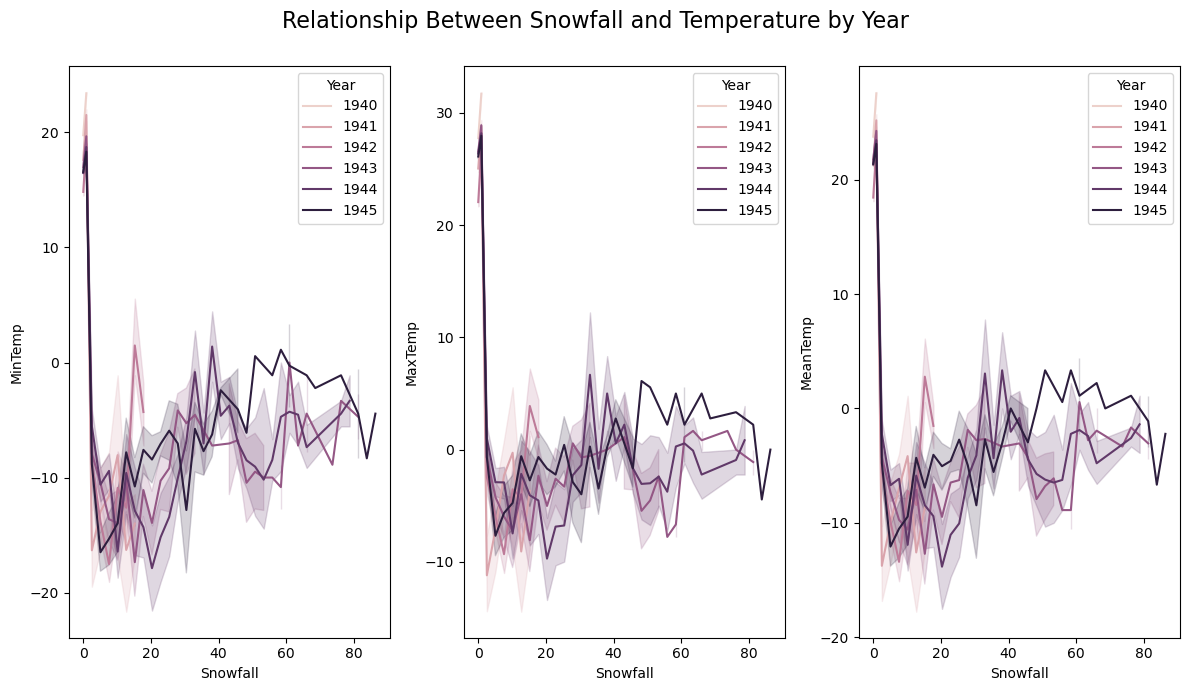

In [29]:
list1=["MinTemp","MaxTemp","MeanTemp"]
fig,ax=plt.subplots(1,3,figsize=(12,7))
ax=ax.flatten()
for i,column in enumerate(list1):
    sns.lineplot(data=df,x="Snowfall",y=column,hue="Year",ax=ax[i])
    
fig.suptitle("Relationship Between Snowfall and Temperature by Year", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9) 

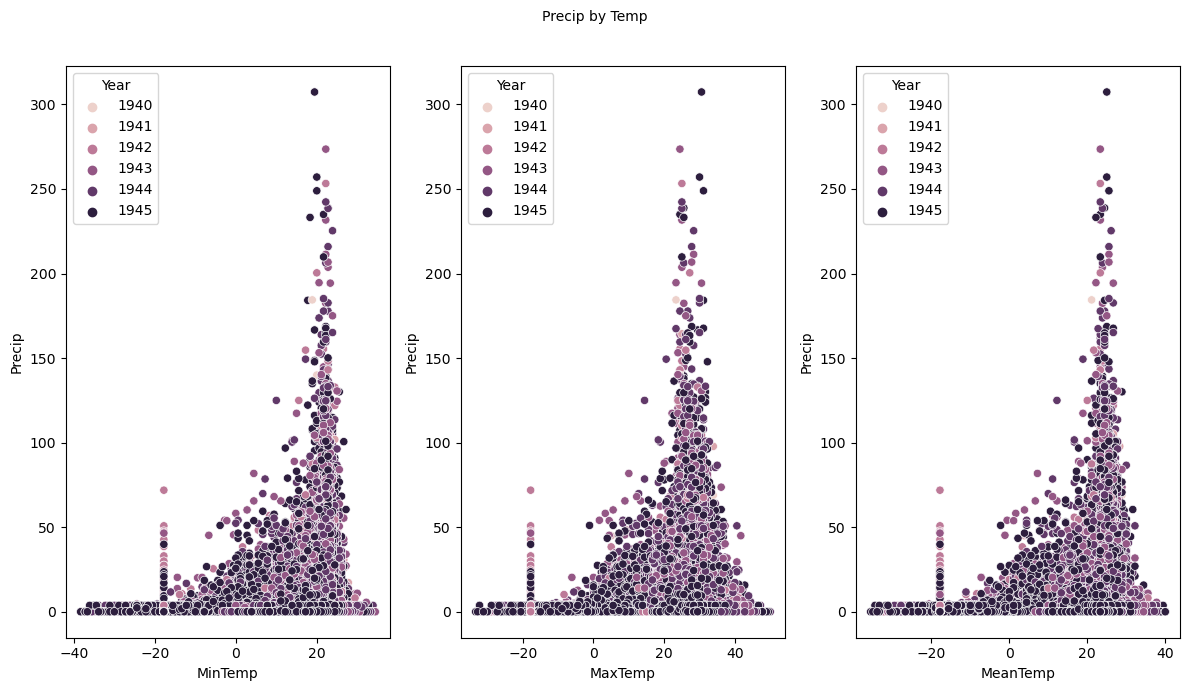

In [30]:
list1=["MinTemp","MaxTemp","MeanTemp"]
fig,ax=plt.subplots(1,3,figsize=(12,7))
for i,column in enumerate(list1):
    sns.scatterplot(data=df,x=column,y="Precip",hue="Year",ax=ax[i])

fig.suptitle("Precip by Temp",fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [31]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

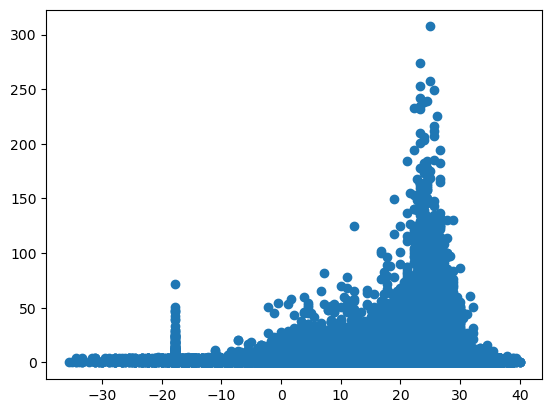

In [32]:
plt.scatter(data=df,x="MeanTemp",y="Precip")

In [33]:
X=df[["MeanTemp","MinTemp","MaxTemp"]]
y=df["Precip"]

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=19)

In [35]:
poly=PolynomialFeatures(degree=2)

In [36]:
Scaler=StandardScaler()

In [37]:
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [38]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [39]:
Regression=LinearRegression()
Regression.fit(X_train_poly,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred=Regression.predict(X_test_poly)
y_pred

array([4.28279851, 4.82714327, 3.18944498, ..., 0.17813535, 1.26432591,
       1.90746855])

In [41]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
R2_score=r2_score(y_test,y_pred)
print("Mse:",mse)
print("Mae:",mae)
print("r2 score:",R2_score)

Mse: 108.49713047658568
Mae: 4.717566386178455
r2 score: 0.04572873450374826


In [42]:
ridge=Ridge()
ridge.fit(X_train_poly,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [43]:
y_pred=ridge.predict(X_test_poly)

In [44]:
R2_score=r2_score(y_test,y_pred)
print(R2_score)

0.045729086768195426


In [45]:
ridgeCv=RidgeCV(cv=5)
ridgeCv.fit(X_train_poly,y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [46]:
y_pred=ridgeCv.predict(X_test_poly)

In [47]:
R2_score=r2_score(y_test,y_pred)
print(R2_score)

0.04572956480854373


In [48]:
def poly_regression(degree):
    poly=PolynomialFeatures(degree=degree)
    scaler=StandardScaler()
    regression=LinearRegression()
    pipeline=Pipeline([("Polinamial_feature",poly),("Scaler",scaler),("Linear_Regression",regression)])
    pipeline.fit(X_train,y_train)
    R2_score=pipeline.score(X_test,y_test)
    print("r2 score:",R2_score)

In [49]:
for degree in range(0,10):
    poly_regression(degree)

r2 score: -2.2628879916553046e-06
r2 score: 0.039830473042802184
r2 score: 0.04572873450374859
r2 score: 0.05147964892824397
r2 score: 0.059685172736478
r2 score: -2.137589233335602
r2 score: -35.42674503955623
r2 score: -18012.545445101146
r2 score: -281198.715163608
r2 score: -7146958.079059001


In [50]:
# I tried Lasso,LassoCv and ElasticNet, ElasticNetCv, r2 scores of these regression are less then Ridge and Linear Regression,so ı deleted them

<Axes: >

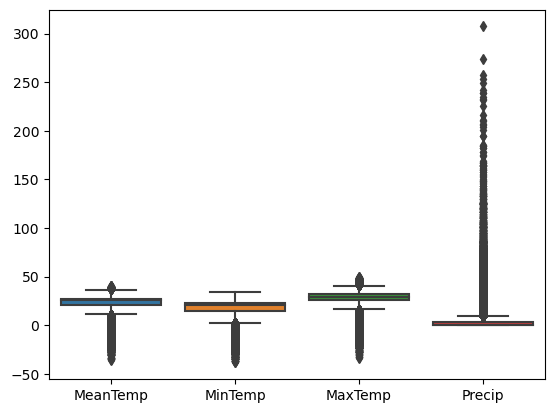

In [51]:
sns.boxplot(data=df[["MeanTemp","MinTemp","MaxTemp","Precip"]])

In [52]:
#çok fazla outlier data var :DDDD ben iptal
#There are many outlier data in dataset so,regression which ı do therefore failed.